In [4]:
from PIL import Image
import matplotlib .pyplot as plt
import os
import cv2
import hashlib
import re
import cv2
import os
import numpy as np
import random

In [5]:
#DATA CLEANING
dataset_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/'
image_checksums = {} # Dictionary of image checksums paths
valid_image_paths = [] #Valid image file paths
expected_pattern = re.compile(r'^\d{4}\.jpg$') #4 digit expression 0001.jpg
inconsistent_names=[]

def compute_image_checksum(image_path):  #compute MD5 checksum of image
    with open(image_path, 'rb') as f:
        image_data = f.read()
        checksum = hashlib.md5(image_data).hexdigest()
    return checksum


for filename in os.listdir(dataset_dir):
    
    if filename.endswith('.jpg'): #check if file ends with .jpg or is valid
        image_path = os.path.join(dataset_dir, filename) #full path
        file_number, file_extension = os.path.splitext(filename)
  
        if file_extension == '.jpg' and len(file_number) == 4 and file_number.isdigit():
            
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    image_checksum = compute_image_checksum(image_path)
                    expected_pattern = f"{len(valid_image_paths) + 1:04d}.jpg"
                    


                    if image_checksum not in image_checksums: #checking if image checksum already exists
                        image_checksums[image_checksum] = image_path
                        valid_image_paths.append(image_path)
                    else:
                        print(f"Duplicate image found and removed: {filename}") #duplicate image identification
                        os.remove(image_path)  
                else:
                    print(f"Invalid image: {filename}")
            except Exception as e:
                print(f"Error processing image: {filename} - {str(e)}")
        else:
            inconsistent_names.append(filename)  # Append naming inconsistencies to the list
            print(f"Naming inconsistency: {filename}")
    else:
        print(f"Non-image file: {filename}")


print(image_checksums)


Non-image file: .DS_Store
Non-image file: Augmented-Images
Non-image file: annotation.txt
{'49fe0965e73a4828e5c4e7a83d4f5e21': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0071.jpg', '9100fd1020a162d6a8f5ce0a2ebde5d8': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0717.jpg', '82911fd377dab7527d8fa3507871931d': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0703.jpg', '438896a8e5bea64e024375fe02c5730b': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0065.jpg', 'bf89a23c15a58ec2f1a37a1d0e1b93e2': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0059.jpg', '9c00c2315b350d870dbb1ea325571c4a': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0918.jpg', '9699b00a5fa0d0cdfbb59e7013ddc042': '/Users/eeshafarrukh/Documents/Data Science/Dataset/Eye-Contact-Dataset/0930.jpg', '9e88c834f7b70f3ea6f7fbba75d9cd2a': '/Users/eeshafarrukh/Documents/Data Scie

In [9]:
#DATA NORMALIZATION

def normalize_image(image):
    normalized_image = image.astype(float) / 255.0   # normalize to the range [0, 1]
    return normalized_image


normalized_images = [] # empty list to store the normalized images

for path in valid_image_paths:
    rgbimg = cv2.imread(path)
    img = cv2.cvtColor(rgbimg, cv2.COLOR_BGR2RGB)
    img_float = img.astype(np.float32) #convert to float

    normalized_image = normalize_image(img_float)
    normalized_images.append(normalized_image) #saving normalized images list


    

print("Normalization completed for all images.")


Normalization completed for all images.


0.0
0.65882355
Image dimensions (width x height): 1280 x 720


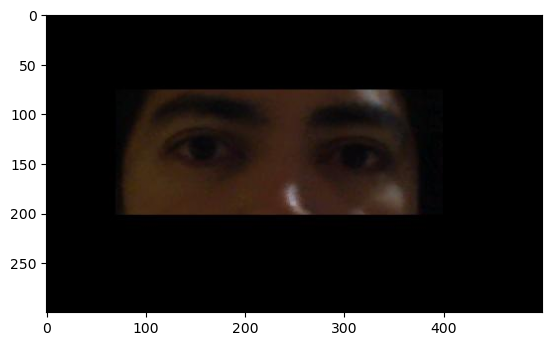

In [10]:
valid_image_paths
img=normalized_images[27]
plt.imshow(img)
img_float = img.astype(np.float32)
print(img_float.min())
print(img_float.max())
rimg = cv2.resize(img, (1280, 720))
crimg =rimg[200:500, 400:900] 
plt.imshow(crimg)
height, width, channels = img.shape
print(f"Image dimensions (width x height): {width} x {height}")

In [11]:
#DATA TRANSFORMATION
base_output_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/Transformed-Images'


transformed_images = []


def transform_image(image):
   
    resized_image = cv2.resize(image, (1280, 720))  # Resize the image to 1280 x 720 uniform size
    cropped_image = resized_image[200:500, 400:900]   # cropping image
    return cropped_image  
os.makedirs(base_output_dir, exist_ok=True)

for i, normalized_image in enumerate(normalized_images): # applying transformation on normalized images
    transformed_image = transform_image(normalized_image)
    transformed_images.append(transformed_image)
    output_path = os.path.join(base_output_dir, f'{i+1:04d}.jpg')
    cv2.imwrite(output_path, transformed_image)

print("Transformation completed for all normalized images.")


Transformation completed for all normalized images.


In [1]:
valid_image_paths
img=transformed_images[1]
plt.imshow(img)
img_float = img.astype(np.float32)
print(img_float.min())
print(img_float.max()) 
plt.imshow(img)


NameError: name 'valid_image_paths' is not defined

In [15]:
#DATA AUGMENTATION
import cv2
import numpy as np
import os
import random

output_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images'
os.makedirs(output_dir, exist_ok=True)

rotation_angles = [15, -15, 30, -30]
scaling_factors = [0.8, 1.2]
crop_height, crop_width = 100, 200
aug_img=[]
augmented_images = []
def augment_image(image):
    augmentation_type = random.choice(['rotate', 'scale', 'flip', 'brightness', 'contrast', 'noise','none'])

    if augmentation_type == 'rotate':
        angle = random.choice(rotation_angles)
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
        augmented_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        augmented_images.append(augmented_image)
    
    #remove scale abd none 
    elif augmentation_type == 'scale':
        scale = random.choice(scaling_factors)
        scaled_image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
        augmented_images.append(scaled_image)
    
    elif augmentation_type == 'flip':
        flipped_image = cv2.flip(image, 1)  # 1 for horizontal flip
        augmented_images.append(flipped_image)

    elif augmentation_type == 'brightness':
        factor = random.uniform(0.5, 2.0)  # Adjust the range as needed
        adjusted_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
        augmented_images.append(adjusted_image)

    elif augmentation_type == 'contrast':
        if image.dtype == np.uint8:
            factor = random.uniform(0.5, 2.0)  # Adjust the range as needed
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            adjusted_image = cv2.convertScaleAbs(gray_image, alpha=factor, beta=0)
            adjusted_image = cv2.cvtColor(adjusted_image, cv2.COLOR_GRAY2BGR)
            augmented_images.append(adjusted_image)

    elif augmentation_type == 'noise':
        mean = 0
        std = random.randint(10, 50)  # Adjust the range as needed
        noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise, dtype=cv2.CV_8U)  # Specify dtype explicitly
        augmented_images.append(noisy_image)

    elif augmentation_type == 'none':
        next

    return augmented_images


for i, transformed_image in enumerate(transformed_images):
    augmented_imagese = augment_image(transformed_image)
    


0.0
178.0
938


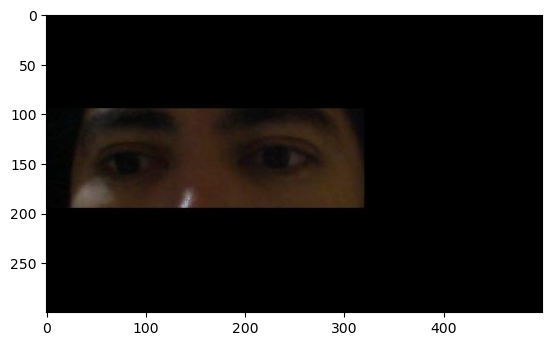

In [16]:
output_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0001.jpg'
valid_image_paths
img=augmented_images[0]
img=cv2.imread(output_dir)
iimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(iimg)

img_float = img.astype(np.float32)
print(img_float.min())
print(img_float.max()) 
print(len(augmented_images)) 



In [17]:

output_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/'

os.makedirs(output_dir, exist_ok=True)

def convert_and_save_images(images, output_directory):
    for i, image in enumerate(augmented_images):
        image = image.astype(np.float32)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        output_path = os.path.join(output_directory, f'{i+1:04d}.jpg')
        cv2.imwrite(output_path, rgb_image*255)
        
        print(f"Image {i+1} converted and saved as {output_path}")
convert_and_save_images(augmented_images, output_dir)


Image 1 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0001.jpg
Image 2 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0002.jpg
Image 3 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0003.jpg
Image 4 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0004.jpg
Image 5 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0005.jpg
Image 6 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0006.jpg
Image 7 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0007.jpg
Image 8 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0008.jpg
Image 9 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0009.jpg
Image 10 converted and saved

0.0
111.0
938


1638

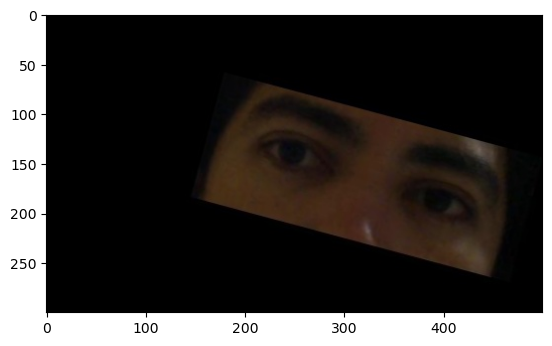

In [28]:
finalDataset = []
for image in transformed_images:
    finalDataset.append(image)
for image in augmented_images:
    finalDataset.append(image)

output_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/Augmented-Images/0001.jpg'
valid_image_paths
img=finalDataset[1550]
img=cv2.imread(output_dir)
iimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(iimg)

img_float = img.astype(np.float32)
print(img_float.min())
print(img_float.max()) 
print(len(augmented_images)) 
finalDataset = finalDataset[:-600]
len(finalDataset)



In [30]:

output_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/'

os.makedirs(output_dir, exist_ok=True)

def convert_and_save_images(images, output_directory):
    for i, image in enumerate(finalDataset):
        image = image.astype(np.float32)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        output_path = os.path.join(output_directory, f'{i+1:04d}.jpg')
        cv2.imwrite(output_path, rgb_image*255)
        
        print(f"Image {i+1} converted and saved as {output_path}")
convert_and_save_images(augmented_images, output_dir)


Image 1 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0001.jpg
Image 2 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0002.jpg
Image 3 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0003.jpg
Image 4 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0004.jpg
Image 5 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0005.jpg
Image 6 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0006.jpg
Image 7 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0007.jpg
Image 8 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0008.jpg
Image 9 converted and saved as /Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/0009.jpg
Image 10 converted and saved as /Users/eeshafarrukh/Documents/Da

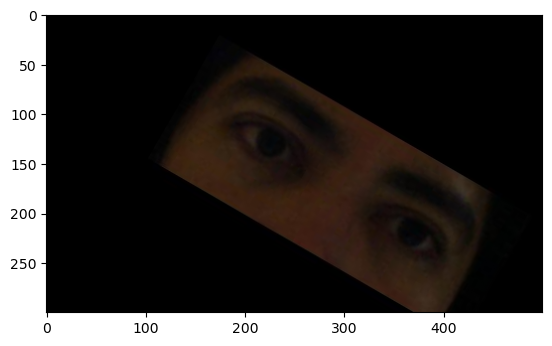

In [43]:
from PIL import Image
from pylab import *
# Read image to array
im=finalDataset[1410]
plt.imshow(im)


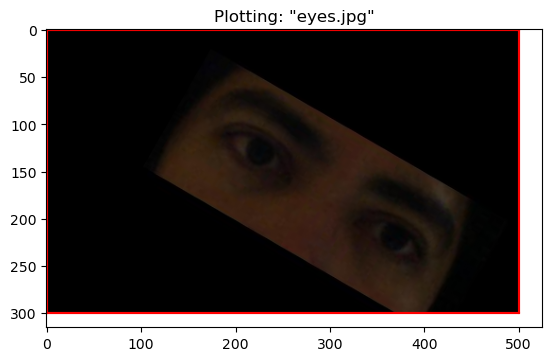

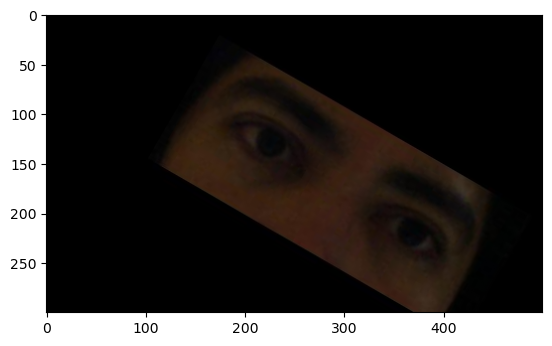

In [62]:
# Plot the image
imshow(im, 'gray')
# Define the coordinates for the four corners of the box
x = [0, 500, 500, 0,0]
y = [0, 0, 300, 300,0]
# Plot the points with red star-markers
plot(x, y, 'r')
# Line plot connecting the points to form a box
plot(x[:2], y[:2], 'r') # 1st to 2nd
plot(x[1:3], y[1:3], 'r') # 2nd to 3rd
plot(x[2:4], y[2:4], 'r') # 3rd to 4th
plot(x[3:], y[3:], 'r') # 4th to 1st
# Add title and show the plot
title('Plotting: "eyes.jpg"')
show()
plt.imshow(im)

In [65]:
#DATA VALIDATION
dataset_dir = '/Users/eeshafarrukh/Documents/Data Science/Dataset/FinalDataset/'
validation_results = []
def check_image_dimensions(image_path, expected_width, expected_height):
    image = cv2.imread(image_path)
    if image is None:
        return False, f"Invalid image file: {image_path}"
    height, width, _ = image.shape
    if height != expected_height or width != expected_width:
        return False, f"Image dimensions mismatch in {image_path}: Expected ({expected_width}, {expected_height}), Actual ({width}, {height})"
    return True, ""

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)
            is_valid = check_image_dimensions(image_path, 1280, 720) 
            validation_results.append((image_path, is_valid))


for image_path, is_valid in validation_results:
    if not is_valid:
        print(f"Validation failed for {image_path}: {message}")

print("Validation completed.")


Validation completed.


In [2]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-an

In [10]:
import ipywidgets as widgets
from IPython.display import display, Image, HTML
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the pre-trained eye gaze classification model
model = load_model('eyemodel.h5')

# Function to preprocess an image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(720, 500))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the image

# Function to classify eye gaze
def classify_eye_gaze(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    classes = ["Blinking", "Looking Left", "Looking Right", "Center"]
    result = classes[class_idx]
    return result

# Create a file upload widget
file_upload = widgets.FileUpload(accept='image/*', multiple=False, description='Upload Image')

# Display result area
result_output = widgets.Output()

# Function to handle file upload
def on_file_upload(change):
    with result_output:
        result_output.clear_output(wait=True)
        img_path = 'uploaded_image.jpg'

        # Save the uploaded image
        uploaded_files = change['new']
        if uploaded_files:
            uploaded_file = uploaded_files[0]
            content = uploaded_file['content']

            with open(img_path, 'wb') as f:
                f.write(content)

            # Display the uploaded image
            display(Image(filename=img_path, width=300, height=200))

            # Classify eye gaze and display result
            result = classify_eye_gaze(img_path)
            print(f"Predicted eye gaze: {result}")

# Attach the file upload handler
file_upload.observe(on_file_upload, names='value')

# Combine widgets for a more structured layout
layout = widgets.VBox([
    widgets.HTML("<h2>Eye Gaze Classifier</h2>"),
    file_upload,
    result_output
])

# Apply some styling to the widgets
layout.layout.align_items = 'center'
file_upload.style.button_color = 'lightblue'
result_output.layout.border = '2px solid lightgray'
result_output.layout.padding = '10px'

# Display the layout
display(layout)


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the pre-trained eye gaze classification model
model = load_model('eyemodel.h5')

# Function to preprocess an image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(720, 500))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the image

# Function to classify eye gaze
def classify_eye_gaze(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    classes = ['Center', 'Looking Left', 'Looking Right','Blinking']
    result = classes[class_idx]
    return result

# Function to handle file upload
def upload_action(event=None):
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img.thumbnail((400, 300))
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img

        # Classify eye gaze and display result
        result = classify_eye_gaze(file_path)
        result_label.config(text=f"Predicted eye gaze: {result}", fg="white")  #



# Create the main window
app = tk.Tk()
app.title("Eye Gaze Classifier")

# Configure window properties
app.geometry("600x500")
app.configure(bg="#363636")  # Dark gray background color

# Create a heading label
heading_label = tk.Label(app, text="Eye Gaze Classifier", font=("Helvetica", 20, "bold"), bg="#363636", fg="white")
heading_label.pack(pady=20)

# Create widgets with enhanced styles
upload_button = tk.Button(app, text="Upload Image", command=upload_action, bg="#222222", fg="white", font=("Helvetica", 14), relief=tk.FLAT)
image_label = tk.Label(app, bg="#363636", fg="white", font=("Helvetica", 12))  # Dark gray background and white text
result_label = tk.Label(app, text="Predicted Eye Gaze: ", font=("Helvetica", 16, "bold"), bg="#363636", fg="white")

# Arrange widgets in an improved layout
upload_button.pack(pady=20)
image_label.pack(pady=20)
result_label.pack(pady=20)

# Start the application
app.mainloop()